In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# ダウンロードしたR.Data開かんし、よくわからないので、これでデータを作成
data= pd.Series([2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 7, 2, 4, 3,3,3, 4, 3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7,2, 2, 6, 2, 4, 5, 4, 5, 1, 3,2,3])

In [4]:
len(data)

50

In [5]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [6]:
# 度数分布
_s = pd.value_counts(data).sort_index()
_s

0     1
1     3
2    11
3    12
4    10
5     5
6     4
7     4
dtype: int64

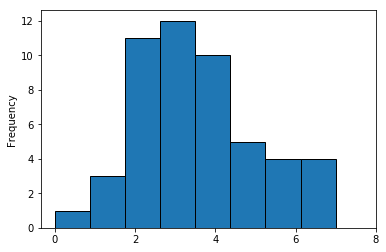

In [7]:
data.plot(kind='hist', bins=8, xticks=[0, 2, 4, 6, 8], ec='black', align='mid')

In [8]:
# 分散
data.var()

2.986122448979592

In [9]:
# 標準偏差
data.std()

1.728040060004279

In [10]:
# 分散の平方根 -> 標準偏差
import math
math.sqrt(data.var())

1.728040060004279

# 2.2 データと確立分布の対応関係をながめる

In [11]:
from scipy.stats import poisson

In [12]:
poisson.stats(3.56)

(array(3.56), array(3.56))

In [13]:
y = [i for i in range(0, 10)]

In [14]:
prob = poisson.pmf(y, 3.56).tolist()

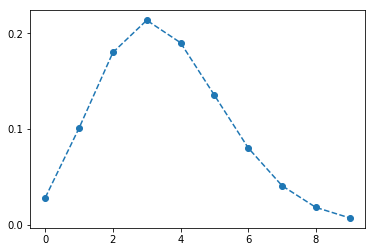

In [27]:
plt.plot(y, prob, marker='o', linestyle='dashed')
plt.yticks([0.0, 0.10, 0.20])
plt.xticks([0, 2, 4, 6, 8])
plt.show()

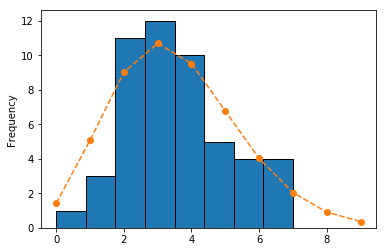

In [39]:
# 重ねてみる. 50倍して単位をあわせている感じだけどもっといい方法あるはず
data.plot(kind='hist', bins=8, ec='black', align='mid')
plt.plot(y, [i * 50 for i in prob], marker='o', linestyle='dashed')
plt.show()

# 2.3 ポアソン分布とは何か？

俺も知りたい

さっきのデータはなんでポアソン分布を選択したの？

* データに含まれている値が{0, 1, 2 ...}といった非負の整数である（カウントデータである）
* 値が下限（ゼロ）はあるみたいだけれど、上限はよくわからない
* この観測データでは平均と分散が大体等しい

In [40]:
poisson.pmf(y, 3.56).tolist()

[0.028438824714184505,
 0.10124221598249684,
 0.18021114444884434,
 0.21385055807929532,
 0.1903269966905728,
 0.13551282164368783,
 0.08040427417525478,
 0.040891316580558154,
 0.01819663587834836,
 0.007197780414102244]

In [67]:
import numpy as np
# ポワソン分布の実装
def poission_pmf(_y, _lambda=3.56):
    under = np.prod([i for i in range(1, _y + 1)])
    return _lambda**_y * (math.e ** - _lambda) / under

In [69]:
for i in range(0, 10):
    print(poission_pmf(i, 3.56))

0.0284388247142
0.101242215982
0.180211144449
0.213850558079
0.190326996691
0.135512821644
0.0804042741753
0.0408913165806
0.0181966358783
0.0071977804141


# 2.4 ポアソン分布のパラメータの最尤推定

In [101]:
range(1, data[0+1])

range(1, 2)

In [108]:
np.sum([math.log(k) for k in range(1, data[i+1])])

1.791759469228055

In [112]:
np.sum([i for i in range(1, 0)])

0.0

In [119]:
# 対数尤度関数
_lambda = 2.0
def log_l(data, _lambda):
    def func(_data, _lambda):
        return _data * math.log(_lambda) - _lambda - np.sum([math.log(k) for k in range(1, _data+1)])
    return np.sum([func(_data, _lambda) for _data in data])

In [134]:
for _lambda in np.arange(2, 6, 0.1):
    print('{:.1f}:{:.1f}'.format(_lambda, log_l(data, _lambda)))

2.0:-121.9
2.1:-118.2
2.2:-114.9
2.3:-112.0
2.4:-109.4
2.5:-107.2
2.6:-105.2
2.7:-103.5
2.8:-102.0
2.9:-100.7
3.0:-99.7
3.1:-98.9
3.2:-98.2
3.3:-97.7
3.4:-97.4
3.5:-97.3
3.6:-97.3
3.7:-97.4
3.8:-97.6
3.9:-98.0
4.0:-98.5
4.1:-99.1
4.2:-99.8
4.3:-100.6
4.4:-101.5
4.5:-102.5
4.6:-103.6
4.7:-104.8
4.8:-106.0
4.9:-107.4
5.0:-108.8
5.1:-110.3
5.2:-111.8
5.3:-113.4
5.4:-115.1
5.5:-116.8
5.6:-118.6
5.7:-120.5
5.8:-122.4
5.9:-124.3


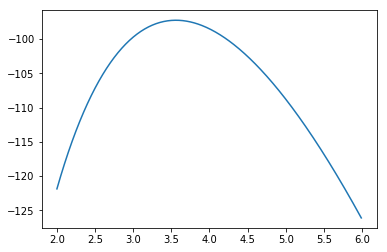

In [143]:
__lambda = np.arange(2, 6, 0.01)
log_l_r = [log_l(data, _lambda) for _lambda in __lambda]
plt.plot(__lambda, log_l_r)

In [144]:
np.argmax(log_l_r)

156

In [145]:
__lambda[156]

3.5599999999999667